In [102]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from itertools import permutations
import numpy as np
from deap import base, creator, tools, algorithms
import networkx as nx

In [103]:
origin = (0, 0)
destin = (4, 4)
address = [(2, 1), (2, 2), (8, 3), (5, 3)]

In [104]:
def print_route(route):
    route_size = len(route)
    distance_traveled = 0

    for i in range(route_size):
        x, y = route[i]
        color = "black"

        if i == 0:
            color = "red"
        elif i == route_size - 1:
            color = "green"

        plt.scatter(x, y, color=color)

        if i < route_size - 1:
            x1, y1 = route[i+1]

            dx = x1 - x
            dy = y1 - y

            plt.arrow(x, y, dx, dy, color="black", head_width=0.1)

            distance_traveled = distance_traveled + euclidean(route[i], route[i+1])

    plt.title(f"Route with a distance of {round(distance_traveled, 2)}")
    plt.show()

In [105]:
def calculate_route_distance(route):
    distance_traveled = 0
    route_size = len(route)
    
    for i in range(route_size):
        if i < route_size - 1:
            distance_traveled = distance_traveled + euclidean(route[i], route[i+1])
    
    return distance_traveled

In [106]:
def brute_force(origin, destin, address):
    min_distance = float("inf")
    min_route = None

    for perm in permutations(address):
        route = [origin] + list(perm) + [destin]
        distance_traveled = calculate_route_distance(route)

        if distance_traveled < min_distance:
            min_distance = distance_traveled
            min_route = route

    return min_route, min_distance

In [107]:
min_route, min_distance = brute_force(origin, destin, address)

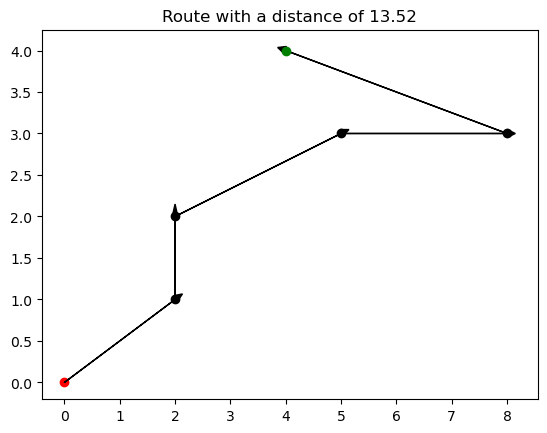

In [108]:
print_route(min_route)

In [109]:
def nearest_neighbor(origin, destin, address):
    currenty_point = origin
    rest_address = address.copy()

    distance_traveled = 0
    min_route = [currenty_point]

    while rest_address:
        min_distance = float("inf")
        next_point = None

        for addrss in rest_address:
            dist = euclidean(currenty_point, addrss)
            if dist < min_distance:
                min_distance = dist
                next_point = addrss

        rest_address.remove(next_point)

        min_route.append(next_point)

        distance_traveled = distance_traveled + min_distance

        currenty_point = next_point

    min_route.append(destin)
    distance_traveled = distance_traveled + euclidean(currenty_point, destin)

    return min_route, distance_traveled

In [110]:
min_route, min_dist = nearest_neighbor(origin, destin, address)

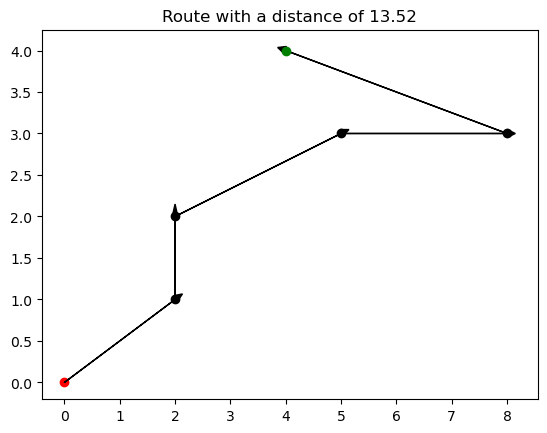

In [111]:
print_route(min_route)

In [112]:
def evaluate(individual, origin, address, destin):
    route = [origin]
    for i in individual:
        route.append(address[i])
    route.append(destin)
    
    distance_traveled = calculate_route_distance(route)
    return distance_traveled,

In [113]:
def genetic_algorithms(
    origin, destin, address, initial_population_size = 100, crossover_prob = 0.7,
    mutation_prob = 0.1, number_of_generations = 100

):
    # Criação dos tipos
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individuo", list, fitness=creator.FitnessMin)

    # Registro de ferramentas
    toolbox = base.Toolbox()
    toolbox.register("Genes", np.random.permutation, len(address))
    toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)
    toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
    toolbox.register("mate", tools.cxPartialyMatched)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutation_prob)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate, origin=origin, address=address, destin=destin)

    # População inicial
    population = toolbox.Populacao(n=initial_population_size)

    # Execução do algoritmo genético
    algoritmo = algorithms.eaSimple(
        population,
        toolbox,
        cxpb=crossover_prob,
        mutpb=mutation_prob,  # Corrigido para usar a probabilidade de mutação
        ngen=number_of_generations,
        verbose=False,  # Alterado para acompanhar o progresso
    )

    best_ind = tools.selBest(population, 1)[0]
    
    min_route = [origin]
    
    for i in best_ind:
        min_route.append(address[i])
    min_route.append(destin)
    
    distance_traveled = calculate_route_distance(min_route)
    
    return min_route, distance_traveled

In [114]:
long_address = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

In [115]:
min_route, distance_traveled = genetic_algorithms(origin, destin, long_address)

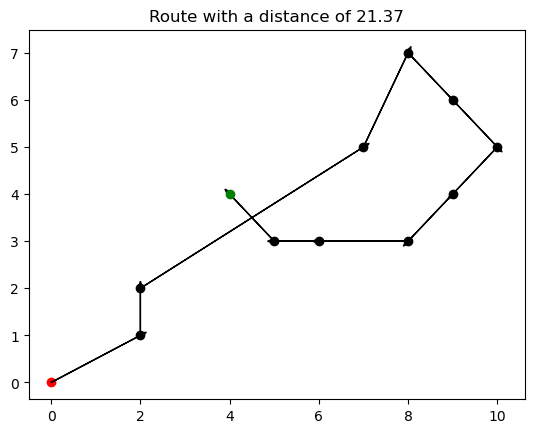

In [116]:
print_route(min_route)

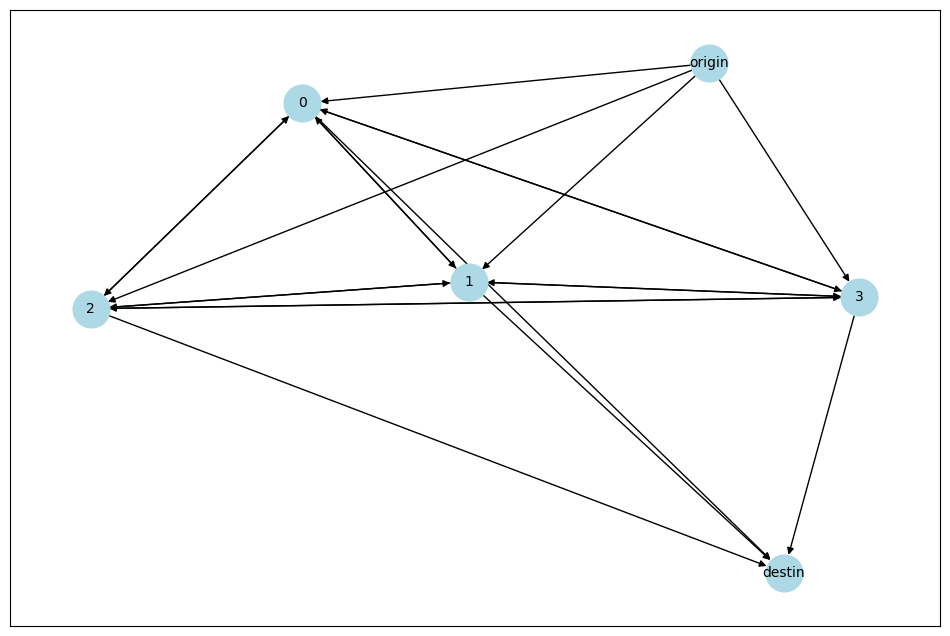

In [117]:
G = nx.DiGraph()

G.add_node("origin", local=origin)
G.add_node("destin", local=destin)

for i, addr in enumerate(address):
    G.add_node(i, local=addr)

for i, addr in enumerate(address):
    G.add_edge("origin", i, distancia=euclidean(origin, addr))
    G.add_edge(i, "destin", distancia=euclidean(addr, destin))
    for j, addr2 in enumerate(address):
        if i != j:
            G.add_edge(i, j, distancia=euclidean(addr, addr2))

plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=True, node_size=700, node_color="lightblue", font_size=10)
plt.show()

In [122]:
G = nx.DiGraph()

G.add_node("origin", local=origin)
G.add_node("destin", local=destin)

for i, addr in enumerate(address):
    G.add_node(i, local=addr)

for i, addr in enumerate(address):
    G.add_edge("origin", i, weight=euclidean(origin, addr))
    G.add_edge(i, "destin", weight=euclidean(addr, destin))
    for j, addr2 in enumerate(address):
        if i != j:
            G.add_edge(i, j, weight=euclidean(addr, addr2))

G.add_edge("destin", "origin", weight=0)
            
cicle = nx.approximation.traveling_salesman_problem(G, weight="weight", cycle=False)
print(tsp)

TypeError: '>=' not supported between instances of 'NoneType' and 'int'